### Inteligência Computacional - Redes Neurais
#### Aluno: Tales Nobre
#### Matrícula: 20200025983

##### Importação das bibliotecas

In [1103]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [1104]:
df = pd.read_csv('data/dataset_egg.csv')
df

,feature1,feature2,label
0,18.229471,11.048747,-1
1,20.181311,10.028006,-1
2,15.160702,20.113133,1
3,23.093181,10.264844,-1
4,22.499823,8.924172,-1
...,...,...,...
295,29.929468,10.174055,1
296,16.734167,5.940355,-1
297,19.851481,6.842028,-1
298,12.045648,16.523968,1


In [1105]:
train_df = df.sample(frac=0.75, random_state=42)
test_df = df.drop(train_df.index)
N_train = len(train_df)
N_test = len(test_df)

#### Normalization

In [1106]:
# # normalizing data
# max_train_val = X.max(axis=0)
# min_train_val = X.min(axis=0)
# range_train = max_train_val - min_train_val

# max_test_val = y.max(axis=0)
# min_test_val = y.min(axis=0)
# range_test = max_test_val - min_test_val

# X = (X - min_train_val)/range_train
# y = (y - min_test_val)/range_test

In [1107]:
max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range = max_val - min_val
train_df = (train_df - min_val)/range
test_df = (test_df - min_val)/range
# print('[0,1] train data:',train_df)
# print('[0,1] test data:',test_df)

In [1108]:
X_train = train_df.drop('label',axis=1)
y_train = train_df['label']
X_test = test_df.drop('label',axis=1)
y_test = test_df['label']

In [1109]:
ncol = [X_train.shape[1]]

##### Rede Neural criada com uma arquitetura de 3 camadas + a de saída, tendo 2 camadas de 12 neurônios e uma de 48. Essa rede foi suficientemente boa para resolver o problema com um loss próximo de 0,02.

In [1110]:
neural_net = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu',input_shape=ncol),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    # tf.keras.layers.Dense(units=1,activation='tanh')
    # tf.keras.layers.Dense(units=1,activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])
print(neural_net.summary())

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_405 (Dense)           (None, 12)                36        
                                                                 
 dense_406 (Dense)           (None, 48)                624       
                                                                 
 dense_407 (Dense)           (None, 12)                588       
                                                                 
 dense_408 (Dense)           (None, 1)                 13        
                                                                 
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________
None


In [1111]:
neural_net.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

losses = neural_net.fit(X_train, y_train,
				validation_data=(X_test, y_test),
				batch_size=N_train//10, 
				epochs=100, # total epoch
)

loss, accuracy = neural_net.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 0.4480 - accuracy: 0.4800 - val_loss: 0.3234 - val_accuracy: 0.5600
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.4800 - val_loss: 0.2633 - val_accuracy: 0.6133
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.6578 - val_loss: 0.2563 - val_accuracy: 0.6000
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.5867 - val_loss: 0.2555 - val_accuracy: 0.4933
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2394 - accuracy: 0.5644 - val_loss: 0.2481 - val_accuracy: 0.5733
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.6622 - val_loss: 0.2371 - val_accuracy: 0.6667
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2252 - accuracy: 0.7022 - val_loss: 0.2296 - val_accuracy: 0.6400
Epoch 8/100

##### Função para salvar a melhor Rede Neural

In [1112]:
models = [neural_net]
validation_losses = [losses.history['val_loss'][-1]]

# Encontra o índice do melhor modelo
best_model_index = validation_losses.index(min(validation_losses))

# Salva o melhor modelo
best_model = models[best_model_index]
best_model.save('best_model.h5')

<Axes: >

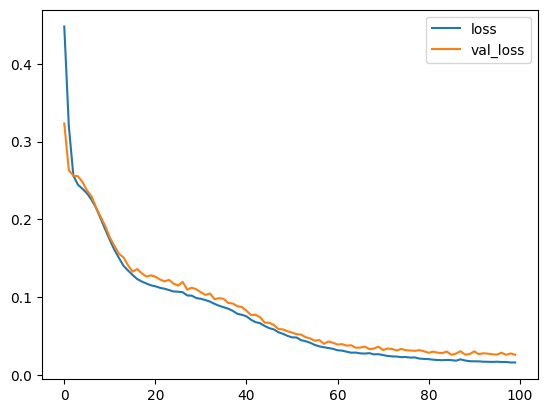

In [1113]:
# some prediction
# print(neural_net.predict(X_test.iloc[0:4,:]))
# print(y_test.iloc[0:4])

# mse vs epoch 
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [1114]:
X = X_test.iloc[:,:]
x1 = (X.iloc[:,0]).to_numpy()
x2 = (X.iloc[:,1]).to_numpy()
y = (y_test.iloc[:]).to_numpy()
ypred = neural_net.predict(X)
ypred = ypred.reshape((len(ypred),))

3/3 [==============================] - 0s 2ms/step


##### Gráfico interativo dos pontos

In [1115]:
fig = go.Figure(data=[go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        symbol='circle'
    )
)])

fig.add_trace(go.Scatter3d(
    x=x1,
    y=x2,
    z=ypred,
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='circle'
    )
))

fig.update_layout(scene=dict(
    xaxis_title='Eixo X',
    yaxis_title='Eixo Y',
    zaxis_title='Eixo Z',
    camera_eye=dict(x=1.25, y=1.25, z=1.25)
))

fig.show()